# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [2]:
import pandas as pd
import numpy as np

def montecarlo(f, N, a, b):
    u = np.random.uniform(a,b,N)
    return np.mean(f(u))*(b-a)

N = [10, 100, 1000, 10000, 100000] 
table = pd.DataFrame(columns=["Aproximación a1","Error a1", "Aproximación a2","Error a2"], index=N)

def a1(x):
    return np.exp(x)*np.log(x)

def a2(x):
    return np.sin(x)*np.log(x)


for i in N:
    table.loc[i,"Aproximación a1"] = montecarlo(a1, int(i), 1, 3)
    table.loc[i,"Aproximación a2"] = montecarlo(a2, int(i), 1, 3)
    
table["Error a1"] = np.abs(14.0275- table["Aproximación a1"])
table["Error a2"] = np.abs(0.869844- table["Aproximación a2"])
table

,Aproximación a1,Error a1,Aproximación a2,Error a2
10,7.848637,6.178863,0.83258,0.037264
100,12.759013,1.268487,0.926861,0.057017
1000,13.637323,0.390177,0.856169,0.013675
10000,14.115602,0.088102,0.868257,0.001587
100000,14.056547,0.029047,0.87155,0.001706


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

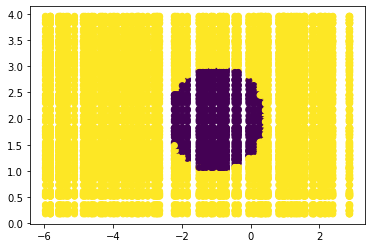

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def circulo(x, y) : 
    return (x**2 + 2*y**2 <= -2*x+8*y-7)

x = np.random.uniform(-6, 3, 100)
y = np.random.uniform(0, 4, 100)
X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, c=~circulo(X, Y))

In [32]:
def montecarlo21(region, ax, bx, ay, by, N) : 
    x = np.random.uniform (ax, bx, N)
    y = np.random.uniform(ay, by , N)
    B = region(x, y)
    AR = (bx - ax)*(by -ay)
    return np.mean(B)*AR

montecarlo21(circulo, -6, 3, 0, 4, 10)

3.6

In [33]:
def error_relativo1(AD, AR) :
    return(np.sqrt((1-AD/AR)/(AD/AR)))
AD = montecarlo2(circulo, -6, 3, 0, 4, 10)
AR = 36
error_relativo1(AD, AR)

3.0

In [34]:
def montecarlo22(region, ax, bx, ay, by, N) : 
    x = np.random.uniform (ax, bx, N)
    y = np.random.uniform(ay, by , N)
    B = region(x, y)
    AR = (bx - ax)*(by -ay)
    return np.mean(B)*AR

montecarlo22(circulo, -6, 3, 0, 4, 100)

5.3999999999999995

In [35]:
def error_relativo2(AD, AR) :
    return(np.sqrt((1-AD/AR)/(AD/AR)))
AD = montecarlo22(circulo, -6, 3, 0, 4, 100)
AR = 36
error_relativo2(AD, AR)

2.4784787961282104

In [36]:
def montecarlo23(region, ax, bx, ay, by, N) : 
    x = np.random.uniform (ax, bx, N)
    y = np.random.uniform(ay, by , N)
    B = region(x, y)
    AR = (bx - ax)*(by -ay)
    return np.mean(B)*AR

montecarlo23(circulo, -6, 3, 0, 4, 1000)

4.104

In [37]:
def error_relativo3(AD, AR) :
    return(np.sqrt((1-AD/AR)/(AD/AR)))
AD = montecarlo23(circulo, -6, 3, 0, 4, 1000)
AR = 36
error_relativo3(AD, AR)

2.830019259476693

In [38]:
def montecarlo24(region, ax, bx, ay, by, N) : 
    x = np.random.uniform (ax, bx, N)
    y = np.random.uniform(ay, by , N)
    B = region(x, y)
    AR = (bx - ax)*(by -ay)
    return np.mean(B)*AR

montecarlo24(circulo, -6, 3, 0, 4, 10000)

4.3992

In [39]:
def error_relativo4(AD, AR) :
    return(np.sqrt((1-AD/AR)/(AD/AR)))
AD = montecarlo24(circulo, -6, 3, 0, 4, 10000)
AR = 36
error_relativo4(AD, AR)

2.6839235173692595

In [40]:
def montecarlo25(region, ax, bx, ay, by, N) : 
    x = np.random.uniform (ax, bx, N)
    y = np.random.uniform(ay, by , N)
    B = region(x, y)
    AR = (bx - ax)*(by -ay)
    return np.mean(B)*AR

montecarlo25(circulo, -6, 3, 0, 4, 100000)

4.41468

In [41]:
def error_relativo5(AD, AR) :
    return(np.sqrt((1-AD/AR)/(AD/AR)))
AD = montecarlo25(circulo, -6, 3, 0, 4, 100000)
AR = 36
error_relativo5(AD, AR)

2.6665145942040143

In [43]:
import pandas as pd

N = np.logspace(1, 5, 5) #Genera 7 elemtos desde 10^1 hasta 10^5
table = pd.DataFrame(columns=["Aproximación1", "Error1", "Aproximación2", "Error2", "Aproximación3", "Error3", "Aproximación4", "Error4", "Aproximación5", "Error5"], index=N)
for i in N : 
    table.loc[i, "Aproximación1"] = montecarlo21(circulo, -6, 3, 0, 4, 10)
    table.loc[i, "Error1"] = error_relativo1(AD, AR)
    table.loc[i, "Aproximación2"] = montecarlo22(circulo, -6, 3, 0, 4, 100)
    table.loc[i, "Error2"] = error_relativo2(AD, AR)
    table.loc[i, "Aproximación3"] = montecarlo23(circulo, -6, 3, 0, 4, 1000)
    table.loc[i, "Error3"] = error_relativo3(AD, AR)
    table.loc[i, "Aproximación4"] = montecarlo24(circulo, -6, 3, 0, 4, 10000)
    table.loc[i, "Error4"] = error_relativo4(AD, AR)
    table.loc[i, "Aproximación5"] = montecarlo25(circulo, -6, 3, 0, 4, 100000)
    table.loc[i, "Error5"] = error_relativo5(AD, AR)
table

,Aproximación1,Error1,Aproximación2,Error2,Aproximación3,Error3,Aproximación4,Error4,Aproximación5,Error5
10.0,10.8,2.666515,2.52,2.666515,4.284,2.666515,4.3812,2.666515,4.47732,2.666515
100.0,3.6,2.666515,4.68,2.666515,4.428,2.666515,4.2768,2.666515,4.44204,2.666515
1000.0,7.2,2.666515,3.96,2.666515,4.716,2.666515,4.4136,2.666515,4.39308,2.666515
10000.0,0.0,2.666515,6.48,2.666515,4.356,2.666515,4.4496,2.666515,4.51008,2.666515
100000.0,7.2,2.666515,3.24,2.666515,4.572,2.666515,4.4424,2.666515,4.42044,2.666515


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

# INGENIERIA FINANCIERA

En finanzas, el método de Monte Carlo se utiliza para simular las diversas fuentes de incertidumbre que afectan el valor del instrumento, cartera o inversión en cuestión, y luego calcular un valor representativo dados estos posibles valores de los insumos subyacentes. En términos de teoría financiera, esto esencialmente, es una aplicación de valoración neutral al riesgo.

# CASO #1

En finanzas corporativas, financiamiento de proyectos y análisis de opciones reales, los métodos de Monte Carlo son utilizados por analistas financieros que desean construir modelos financieros " estocásticos " o probabilísticos en contraposición a los tradicionales. Para analizar las características del valor actual neto (VAN) de un proyecto, se modelan los componentes del flujo de caja que están impactados por la incertidumbre, incorporando cualquier correlación entre estos, reflejando matemáticamente sus "características aleatorias". Luego, estos resultados se combinan en un histograma de VPN (es decir, la distribución de probabilidad del proyecto ) y se observa el VPN promedio de la inversión potencial, así como su volatilidad y otras sensibilidades. Esta distribución permite, por ejemplo, estimar la probabilidad de que el proyecto tenga un valor presente neto mayor que cero (o cualquier otro valor).

# Caso #2

Los métodos de Monte Carlo se utilizan para la evaluación de la cartera. Aquí, para cada muestra, se simula el comportamiento correlacionado de los factores que impactan en los instrumentos componentes a lo largo del tiempo, se calcula el valor resultante de cada instrumento y luego se observa el valor de la cartera. En cuanto a las finanzas corporativas, los diversos valores de la cartera se combinan en un histograma, y se observan las características estadísticas de la cartera y la cartera se evalúa según sea necesario. Se utiliza un enfoque similar para calcular el valor en riesgo que es una aplicación más conocida de la simulación a las carteras.

# Caso #3

Los métodos Monte Carlo se utilizan para la planificación financiera personal. Por ejemplo, al simular el mercado general, se pueden calcular las posibilidades de que un 401 (k) permita la jubilación con un ingreso objetivo. Según corresponda, el trabajador en cuestión puede entonces correr mayores riesgos con la cartera de jubilación o comenzar a ahorrar más dinero.